# Single variable logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score 

In [2]:
# Load data from CSV
path = os.getcwd() + '/dane_egz.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [3]:
# Zad. 1
# Split data
X = data[['Exam 1', 'Exam 2']]
y = data['Admitted']

# Extract values from dataframe
X = np.array(X.values)
y = np.array(y.values)

# Normalize data
for i in range(X.shape[1]):
    X[:, i] = (X[:, i] - X[:, i].mean()) / X[:, i].std()

# Add column of ones to X array
X = np.column_stack([np.ones(X.shape[0]), X])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

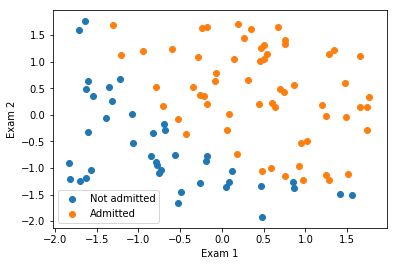

In [4]:
# Zad. 2
# Plot data using scatter plot
plt.figure(1)
plt.scatter(x=X[y==0, 1], y=X[y==0, 2])
plt.scatter(x=X[y==1, 1], y=X[y==1, 2])
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend(['Not admitted', 'Admitted'])
plt.show()

In [5]:
# Zad. 3
# Sigmoid function
def sigmoid(t):
    return 1.0 / (1.0 + np.exp(-t))

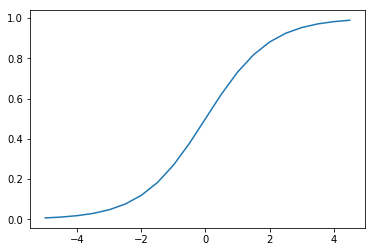

In [6]:
# Check for sigmoid function implementation
t = np.arange(-5, 5, 0.5)
y_val = sigmoid(t)
plt.figure(2)
plt.plot(t, y_val)
plt.show()

In [7]:
# Zad. 4
# Cost function implementation
def cost(theta, X, y):
    h = sigmoid(X @ theta)
    return (-y * np.log(h)-(1-y) * np.log(1-h)).mean()

In [8]:
# Sanity check of cost function
theta = np.zeros(3)
print('Cost function values is {}'.format(cost(theta, X, y)))

Cost function values is 0.6931471805599453


In [9]:
# Zad. 5
# Gradient
def gradient_prosty(X, y, theta, alpha, it):
    # it - liczba iteracji
    cost_l = []
    for i in range(it):
        h = sigmoid(X @ theta)
        theta = theta - alpha * (X.T @ (h - y)) / len(y)
        cost_l.append(cost(theta, X, y))
    return theta, cost_l

In [10]:
# Learn
alpha = 1
it = 150
theta_best, costs = gradient_prosty(X_train, y_train, theta, alpha, it)
print('Cost value is {}'.format(costs[-1]))
print('Best theta: {}'.format(theta_best))

Cost value is 0.17146644046300083
Best theta: [1.32383887 3.32553555 3.39843981]


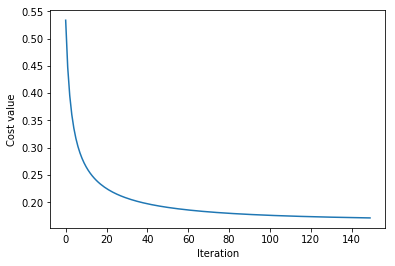

In [11]:
# Plot cost against iteration
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost value')
plt.show()

In [12]:
# Zad. 6
# Predict
threshold = 0.5
predictions_proba = X_test @ theta_best
y_pred = np.array(predictions_proba > threshold, dtype=np.uint8)

In [13]:
# Accuracy score
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Accuracy = {}'.format(accuracy))

Accuracy = 0.7666666666666667


# Regresja logistyczna - Python

### Zadanie 1 - regresja logistyczna dla problemu kilku klas

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [15]:
# Load data
iris = datasets.load_iris()
X = iris.data[:, :2] # only first 2 parameters
Y = iris.target

# Normalize data
for i in range(X.shape[1]):
    X[:, i] = (X[:, i] - X[:, i].mean()) / X[:, i].std()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [16]:
# Zad. 1
# Create regressor classifiers with proper parameters
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=150)

In [17]:
# Zad. 2
# Learn classifier
logreg.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=150, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
# Predict
y_pred = logreg.predict(X_test)

In [19]:
# Zad. 3
y_pred_proba = logreg.predict_proba(X_test)
# print(y_pred_proba)

In [20]:
# Zad. 4
# Accuracy
# accuracy = accuracy_score(y_test, y_pred)
accuracy = logreg.score(X_test, y_test)
print('Accuracy = {}'.format(accuracy))

Accuracy = 0.7777777777777778


In [21]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.78      0.74        18
           2       0.73      0.65      0.69        17

   micro avg       0.78      0.78      0.78        45
   macro avg       0.81      0.81      0.81        45
weighted avg       0.78      0.78      0.78        45



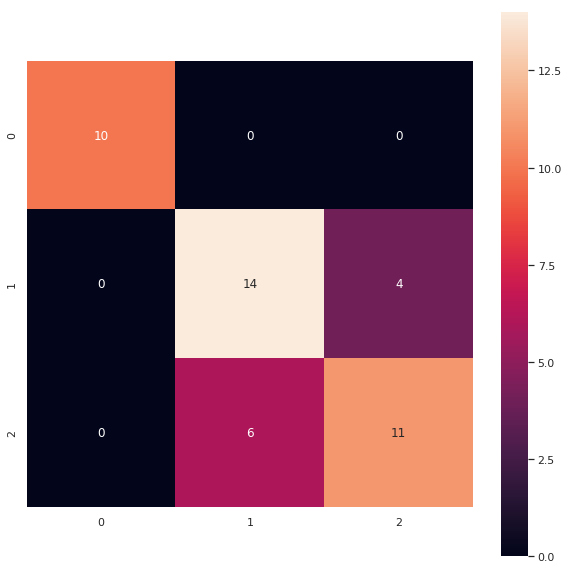

In [22]:
# Pretty print confusion matrix using seaborn package
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(data=cm, annot=True, fmt='g', square=True)

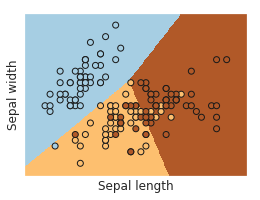

In [23]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()